Our goal is to build KNN and ANN algortheims from scratch to match points between two images.

In [ ]:
import numpy as np
import pandas as pd
import io
from PIL import Image, ImageDraw
from IPython.display import display
# from google.colab import files
# uploaded = files.upload()


***Assigniment 1 :***

*1. implmenting the linear algortheim KNN from scrach*

KNN Class :

In [ ]:
from math import sqrt
from math import dist
from scipy.spatial.distance import cdist
# method for distances
def euclidean_distance(row1,row2):

 distance = 0.0
 for i in range(len(row1)-1):
   if (not isinstance(row1[i], str)) and (not isinstance(row2[i], str)):
    distance += (row1[i] - row2[i])**2
 return sqrt(distance)


class KNN :

   # constructor , k=3 as default value
   def __init__(self , k=1):
      self.k=k

   # insert trainig set to data structure
   def fit(self,X, Y):
     self.X_train=X
     self.Y_train=Y

     # return the k nearst neighbors
   def kneighbors(self, X):
     predictions = pd.DataFrame(columns=["sample_number","Y","X","scale","angle","distance"])
     for i in range(X.shape[0]):
       pred = self.predict(X.iloc[i],i)
       predictions=pd.concat([predictions, pred], ignore_index=True)
     return predictions



   # helper method, that give us tuple of k nearst neighbors and their distance
   def predict(self, x,sample_num):
      distances=[0] * self.X_train.shape[0]
      for i in range(self.X_train.shape[0]):
         distances[i] = dist(x,self.X_train.iloc[i])
      k_indices = np.argsort(distances)[:self.k]
      k_nearest_neighbors={"sample_number":[],"Y":[],"X":[],"scale":[],"angle":[],"distance":[]}
      k_nearest_neighbors_df = pd.DataFrame(k_nearest_neighbors)
      for i in k_indices:
          sample_number=str(sample_num).replace('.', '')
          new_row={"sample_number":sample_number,"Y": (self.Y_train.iloc[i,0]), "X": (self.Y_train.iloc[i,1]), "scale": (self.Y_train.iloc[i,2]), "angle": (self.Y_train.iloc[i,3]), "distance": (distances[i])}
          k_nearest_neighbors_df = pd.concat([k_nearest_neighbors_df, pd.DataFrame(new_row, index=[0])], ignore_index=True)
      return k_nearest_neighbors_df




*2. implmenting RKDT algortheim from scratch*

KD Tree Class :

In [ ]:
import numpy as np
import random
from collections import deque

#The node of the KD-Tree includes :
#1. the samples that suitble for the previous split
#2.the feature that we want to split the childs node according to,
#3.the median of the deature values
#4.left node with the samples that less than the median of the current node feature
#5.right node with the samples that bigger than the median of the current node feature
class KDNode:
    def __init__(self, samples=None,feature=None,median=None, left=None, right=None):

        self.samples=samples
        self.feature=feature
        self.median=median
        self.left = left
        self.right = right



class KDTree:
  def __init__(self,data,N):
    self.data=data
    self.N=N
    self.root = self._build(data)

  def _build(self,data):
    #if we reach node with the N = maximum number of samples we stop.
    if data.shape[0]<=self.N :

      return KDNode(samples=data)

    #Choosing random feature for the split
    coulmns_names=list(data.columns)
    random_feature=random.choice(coulmns_names[4:])
    #sorting the data to find the median
    sorted_data=data.sort_values(by=random_feature )
    median_index= len(data)//2
    median_of_feature=sorted_data.iloc[median_index][random_feature]



    #creating the left and right nodes recursivley
    left_node= self._build(sorted_data[:median_index])
    right_node= self._build(sorted_data[median_index+1: ])

    return KDNode(samples=sorted_data,feature=random_feature,median=median_of_feature,left=left_node,right=right_node)



The ANN Class :

In [ ]:
from numpy.core.numeric import indices

class ANN:

  #1.N is the maximum of samples in leaf
  #2.L is the number of kd-tree to build
  #3.k the number of nearst neighbors to return
  def __init__(self, N, L,k,data):
   self.N=N
   self.L=L
   self.k=k
   self.data=data
   self.kd_trees=None

  def fit(self, X , Y):
    self.X_train=X
    self.Y_train=Y
   #Creating L KD-Trees
    self.kd_trees= list()
    for i in range(self.L):
      kd_tree=KDTree(data=self.data,N=self.N)
      self.kd_trees.append(kd_tree)


  # this method receive dataset, and for everty row in this data set it send it to kneighbors_helper to find the k nearst neighbors for this row
  def kneighbors(self, X):
     predictions = pd.DataFrame(columns=["sample_numebr","Y","X","scale","angle","distance"])
     for i in range(X.shape[0]):
       pred = self.kneighbors_helper(X.iloc[i],i)
       predictions=pd.concat([predictions, pred], ignore_index=True)
     return predictions

  # this method with given root of tree it traverse the tree (recurceivly) according to the appropirate features values of specific observation
  # and returns node with the nearst observations
  def search_in_tree(self,node, x):
    if node is None:
      return
    if node.feature is None :
      return node
    feature= node.feature
    if node is not None and x[feature] > node.median:
     return self.search_in_tree(node.right, x)
    if node is not None and x[feature] < node.median:
      return self.search_in_tree(node.left, x)
    return node
    if node.left is None and node.right is None :
      return node

  def kneighbors_helper(self, x,sample_num):
   #Extracting the nodes from the trees
    nodes = list()
    for _tree in self.kd_trees:

      kd_node=self.search_in_tree(node=_tree.root, x=x)
      if kd_node is not None:
       nodes.append(kd_node)


    #Extracting the observations from the nodes
    samples=pd.DataFrame( columns = ['Y', 'X', 'scale', 'angle', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34', 'feature35', 'feature36', 'feature37', 'feature38', 'feature39', 'feature40', 'feature41', 'feature42', 'feature43', 'feature44', 'feature45', 'feature46', 'feature47', 'feature48', 'feature49', 'feature50', 'feature51', 'feature52', 'feature53', 'feature54', 'feature55', 'feature56', 'feature57', 'feature58', 'feature59', 'feature60', 'feature61', 'feature62', 'feature63', 'feature64', 'feature65', 'feature66', 'feature67', 'feature68', 'feature69', 'feature70', 'feature71', 'feature72', 'feature73', 'feature74', 'feature75', 'feature76', 'feature77', 'feature78', 'feature79', 'feature80', 'feature81', 'feature82', 'feature83', 'feature84', 'feature85', 'feature86', 'feature87', 'feature88', 'feature89', 'feature90', 'feature91', 'feature92', 'feature93', 'feature94', 'feature95', 'feature96', 'feature97', 'feature98', 'feature99', 'feature100', 'feature101', 'feature102', 'feature103', 'feature104', 'feature105', 'feature106', 'feature107', 'feature108', 'feature109', 'feature110', 'feature111', 'feature112', 'feature113', 'feature114', 'feature115', 'feature116', 'feature117', 'feature118', 'feature119', 'feature120', 'feature121', 'feature122', 'feature123', 'feature124', 'feature125', 'feature126', 'feature127', 'feature128'])
    for _node in nodes:
      df_new_row = pd.DataFrame(_node.samples)
      samples = pd.concat([samples, df_new_row])
    samples.iloc[:]

    #Dropping the duplicates, because it's possible to get the same observations from diffrent trees
    unique_samples=samples.drop_duplicates(subset=['Y', 'X', 'scale', 'angle'])

    #Calculating the distances from the row with each observation, and sorting the distances and return the k nearst observations
    samples_labels= unique_samples.iloc[:,:4]
    samples_features=unique_samples.iloc[:,4:]

    distances=[0] * samples_features.shape[0]
    for i in range(samples_features.shape[0]):
         distances[i] = dist(x,samples_features.iloc[i])
    k_indices = np.argsort(distances)[:self.k]

    k_nearest_neighbors={"sample_numebr":[],"Y":[],"X":[],"scale":[],"angle":[],"distance":[],"index":[]}
    k_nearest_neighbors_df = pd.DataFrame(k_nearest_neighbors)
    for i in k_indices:
          sample_number=str(sample_num).replace('.', '')
          new_row={"sample_numebr":sample_number,"Y": ( samples_labels.iloc[i,0]), "X": ( samples_labels.iloc[i,1]), "scale": ( samples_labels.iloc[i,2]), "angle": ( samples_labels.iloc[i,3]), "distance": (distances[i]),"index":(int(samples_features.index[i]+2))}
          k_nearest_neighbors_df = pd.concat([k_nearest_neighbors_df, pd.DataFrame(new_row, index=[0])], ignore_index=True)

    #k_nearest_neighbors = [( samples_labels.iloc[i], distances[i][0]) for i in k_indices]
    return k_nearest_neighbors_df

  #this method takes test dataset and predict from wich file the sample taken
  def predict(self, X):
      #finding the k nearst neighbors
      kneighbors_result= self.kneighbors(X)

      #building data structure to store the results
      predictions_of_classes=pd.DataFrame(columns=["class"])

      #running into kneighbors method result with k
      for i in range(0,kneighbors_result.shape[0]+1-self.k,self.k):
        if(i<kneighbors_result.shape[0]):
          #sending to predict helper the k neighbors of each sample
          prediction_of_sample = self.predict_help(kneighbors_result.iloc[i:i+self.k,:],index_sample=i)
          predictions_of_classes=pd.concat([predictions_of_classes, prediction_of_sample], ignore_index=True)
      return predictions_of_classes

  #helper method that counts the classes
  def predict_help(self , kneighbors_samples ,index_sample):
     count_to_predict=0
     classes_predictions=pd.DataFrame(columns=["class"])
     for i in range(kneighbors_samples.shape[0]):

        #if the index of the neighbor is bigger than the number of rows in the first dataset so its belong to the second file
        if(int(kneighbors_samples.iloc[i,6])>779):
          count_to_predict+=1
     if(count_to_predict<=(self.k//2)):
          new_row={"class":'Hananya1'}
          classes_predictions = pd.concat([classes_predictions, pd.DataFrame(new_row, index=[0])], ignore_index=True)

     else :
          new_row={"class":'Hashmal1'}
          classes_predictions = pd.concat([classes_predictions, pd.DataFrame(new_row, index=[0])], ignore_index=True)

     return classes_predictions




***Assigniment 2 :***

3.*Runing KNN Model with one picture as train dataset, and another picture as test dataset, and calculating the running time.*

In [ ]:
hananya_one=pd.read_csv('Hananya1.csv')
hananya_two = pd.read_csv('Hananya2.csv')
hashmal_one= pd.read_csv('Hashmal1.csv')
hashmal_two= pd.read_csv('Hashmal2.csv')
img1= Image.open("Hananya1.JPG")
img2 = Image.open("Hananya2.JPG")

In [ ]:
#spliting the data into features and labels
hashmal1_features= hashmal_one.iloc[:,4:]
hashmal1_labels= hashmal_one.iloc[:,:4]
hashmal2_features= hashmal_two.iloc[:,4:]
hashmal2_labels= hashmal_two.iloc[:,:4]


In [ ]:
%%time
import time
start_time_knn=time.time()
#Training the model with 'Hananya1' picture dataset
knn_model = KNN(k=1)
#Spliting the dataset to features and labels
hananya1_features = hananya_one.iloc[: , 4:]
hananya1_labels = hananya_one.iloc[: , :4]
knn_model.fit(X=hananya1_features ,Y=hananya1_labels)

#Testing the model with 'Hananya2' picture dataset
hananya2_features = hananya_two.iloc[: , 4:]
hananya2_labels=hananya_two.iloc[: , :4]
kneighbors_using_knn=knn_model.kneighbors(hananya2_features.iloc[:,:])
end_time_knn=time.time()
total_time_knn=end_time_knn - start_time_knn
print(kneighbors_using_knn)



    sample_number       Y       X  scale  angle    distance
0               0  201.45  383.78  15.63  1.636  124.201449
1               1  235.13  331.52   7.26  1.358  347.777228
2               2  207.54  141.90   1.27  1.393  197.567710
3               3  207.54  141.90   1.27  1.393  149.057036
4               4  201.50   41.66   1.20  1.451  117.813412
..            ...     ...     ...    ...    ...         ...
908           908  206.91  216.79   1.36  1.817  147.315987
909           909  204.13  122.59   1.72  1.816  132.996241
910           910  220.95  476.23   1.87  1.327  202.012376
911           911  203.97  219.03   1.14  1.654  135.790279
912           912  200.84  124.57   1.16  1.580  143.739347

[913 rows x 6 columns]
Wall time: 1min 32s


***Assigniment 3 :***
חלק ג

*4. Checking accuracy according to this formula :*

 $$E = \frac{1}{N} \sum_{p=1}^{N} \frac{d(ANN(p))}{d(NN(p))}-1$$

In [ ]:
import itertools

#intilazizing the grid_search data structure
grid_search={"L_values" : [] , "N_values": [] , "error_values":[],"time":[]}

#values of hyperparmaters

hyper = [[3,10],[3,50],[5,20],[5,9],[5,33],[2,10],[3,15],[4,9],[9,27],[10,8]]
for h in range(10):
    total_sum = 0
    count = 0
    start_time = time.time()
    #running the ann model with the hyperparmaters
    ann_model= ANN(N=hyper[h][1] ,L=hyper[h][0],k=1,data=hananya_one)
    ann_model.fit(X=hananya1_features ,Y=hananya1_labels)
    ann_kneighbors=ann_model.kneighbors(hananya2_features.iloc[:,:])
    knn_kneighbors=kneighbors_using_knn

    #calculating the error value according to the formula

    for i in ann_kneighbors.index:

     total_sum+=(((ann_kneighbors.loc[i, "distance"])/(knn_kneighbors.loc[i, "distance"]))-1)
     count=count+1
    error_=((1/count)*total_sum)
    end_time = time.time()

    #calculating the excuting time for each itration
    time_taken = end_time - start_time

    #storing the values
    grid_search["L_values"].append(hyper[h][0])
    grid_search["N_values"].append(hyper[h][1])
    grid_search["error_values"].append(error_)
    grid_search["time"].append(time_taken)

grid_search = pd.DataFrame(grid_search)
min_score_row = grid_search.loc[grid_search['error_values'].idxmin()]
print(grid_search)
print("The best hyperparmter is : ")
print(min_score_row)

   L_values  N_values  error_values       time
0         3        10      0.083727  38.324558
1         3        50      0.039910  27.116459
2         5        20      0.036367  22.169051
3         5         9      0.046295  21.778595
4         5        33      0.022093  22.335635
5         2        10      0.140241  11.337920
6         3        15      0.071561  14.060120
7         4         9      0.064359  19.838127
8         9        27      0.006801  34.512455
9        10         8      0.021410  29.617977
The best hyperparmter is : 
L_values         9.000000
N_values        27.000000
error_values     0.006801
time            34.512455
Name: 8, dtype: float64


*5.Checking Valdiation :*



In [ ]:
import math
#choosing the first row as best hyperparmters because the dataframe is sorted starting from the best
best_hyperpatmters=min_score_row
l_val=int(best_hyperpatmters["L_values"])
n_val=int(best_hyperpatmters["N_values"])
print(l_val)
#running the ann model on the best hyperpamrters
start_time_ann=time.time()
ann_model= ANN(N=n_val ,L=l_val,k=2,data=hananya_one)
ann_model.fit(X=hananya1_features ,Y=hananya1_labels)
ann_nieghbors=ann_model.kneighbors(hananya2_features.iloc[:,:])

end_time_ann=time.time()
total_time_ann=end_time_ann - start_time_ann
attribution={"sample":[],"nearest_n_Y":[],"nearest_n_X":[],"nearest_n_distance":[],"ratio":[]}
for i in range(0,ann_nieghbors.shape[0]-1,2):
    if(i<ann_nieghbors.shape[0]):

      #taking the nearst n ,and the second nearst with their distances
      nearest_n=ann_nieghbors.iloc[i,:]
      second_nearest =ann_nieghbors.iloc[i+1,:]
      nearest_n_distance=nearest_n.iloc[5]
      second_nearest_distance=second_nearest.iloc[5]

      #calculating the ratio
      ratio = (nearest_n_distance/second_nearest_distance)

      attribution["sample"].append(ann_nieghbors.loc[i,"sample_numebr"])

      #if the ratio less than 0.8 return the nearst neighbor
      if ratio < 0.8:
          attribution["nearest_n_Y"].append(nearest_n.iloc[1])
          attribution["nearest_n_X"].append(nearest_n.iloc[2])
          attribution["nearest_n_distance"].append(nearest_n.iloc[5])
          attribution["ratio"].append(ratio)
      #if the ratio bigger than 0.8 return just the distance
      else :
          attribution["nearest_n_Y"].append(None)
          attribution["nearest_n_X"].append(None)
          attribution["nearest_n_distance"].append(nearest_n.iloc[5])
          attribution["ratio"].append(ratio)

#printing the results
attribution = pd.DataFrame(attribution)
attribution=attribution.sort_values(["ratio"],ascending=[True])
print(attribution)
count_neasrt_n=0
print(attribution.shape[0])
for i in range(attribution.shape[0]):

  if( math.isnan(attribution.loc[i,"nearest_n_Y"])):

    count_neasrt_n =count_neasrt_n+1
print("The number of samples that get None as nearst neighbor is : ")
print( count_neasrt_n)
print(count_neasrt_n/913)


9
    sample  nearest_n_Y  nearest_n_X  nearest_n_distance     ratio
580    580       255.74       595.31          146.482081  0.435665
451    451       205.17        91.48           98.137658  0.545487
574    574       275.40       533.24          211.950466  0.579734
134    134       216.41        75.91          161.452779  0.584066
206    206       209.82       410.09           88.758098  0.594915
..     ...          ...          ...                 ...       ...
661    661          NaN          NaN          347.018731  0.999448
300    300          NaN          NaN          293.557490  0.999496
381    381          NaN          NaN          307.681654  0.999657
422    422          NaN          NaN          328.233149  0.999671
222    222          NaN          NaN          251.888864  0.999961

[913 rows x 5 columns]
913
The number of samples that get None as nearst neighbor is : 
857
0.9386637458926615


Text(0.5, 0, 'samples (grouped by 30)')

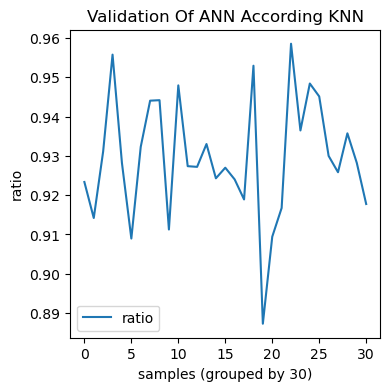

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Group the data by every 20 samples and calculate the mean
grouped_data = attribution['ratio'].groupby(attribution.index // 30).mean()
# Set the width and height of the figure
plt.figure(figsize=(4,4))
# Add title
plt.title("Validation Of ANN According KNN")
# Line chart
sns.lineplot(data=grouped_data, label="ratio")
# Add label for horizontal axis
plt.xlabel("samples (grouped by 30)")

approximate to 850 from the samples have no nearst neighbors that's means the
0.940 from the data didn't have approprate point in the other picture, that could happen for severeal reasons such as taking diffrent lightness for the two pictures or other features.

*point the nearset neighbor in the second picture*

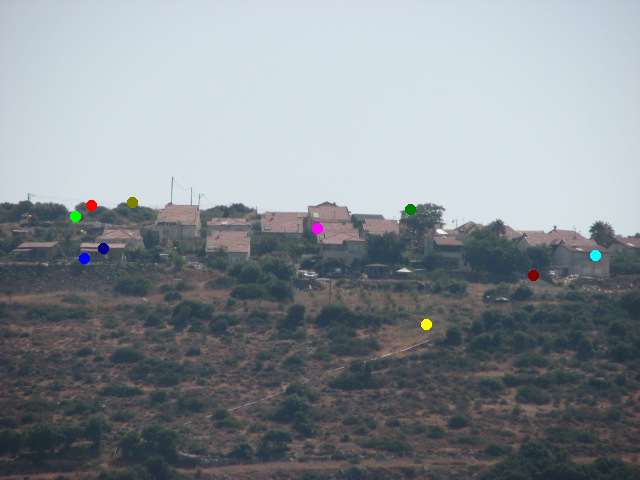

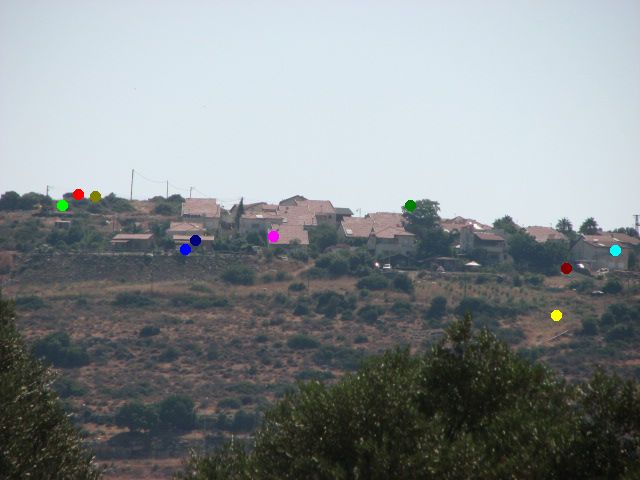

In [ ]:

best_ten= attribution.iloc[:10]
# Load the images


labels2 = hananya_two.iloc[: , :4]
l_val=int(best_hyperpatmters["L_values"])
n_val=int(best_hyperpatmters["N_values"])

colors=[(0,255,255),(255,0,0),(128,0,0),(0,255,0),(0,128,0),
        (0,0,255),(0,0,128),(255,255,0),(128,128,0),(255,0,255)]
point_size=5
draw2 = ImageDraw.Draw(img2)
draw1=ImageDraw.Draw(img1)
y1=0
x1=0
for  m in range(best_ten.shape[0]):
   color= colors[m%len(colors)]
   y1=int(best_ten.iloc[m,1])
   x1=int(best_ten.iloc[m,2])
   sample=int(best_ten.iloc[m,0])
   y2=int(hananya2_labels.iloc[sample,0])
   x2=int(hananya2_labels.iloc[sample,1])
   draw1.ellipse((x1-point_size,y1-point_size,x1+point_size,y1+point_size),fill=color)
   draw2.ellipse((x2-point_size,y2-point_size,x2+point_size,y2+point_size),fill=color)

# img1.show()
# img2.show()

# show the images
display(img1)
display(img2)




*6. comparing the two algortheims , KNN VS ANN :*

by excuting time :

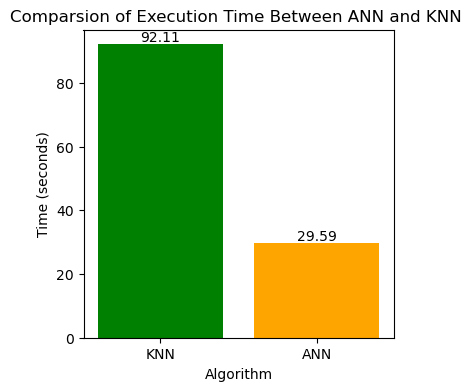

In [ ]:

# Define the data dictionary
data = {'Algorithm_name': ['KNN', 'ANN'], 'Time': [total_time_knn, total_time_ann]}
# Create a DataFrame from the dictionary
execution_time_df = pd.DataFrame(data)
# Set the width and height of the figure
plt.figure(figsize=(4,4))
#colors of bar chart
colors=['green','orange']
# Create a bar plot
plt.bar(execution_time_df['Algorithm_name'], execution_time_df['Time'],color=colors)
# Add values above the bars
for i, val in enumerate(execution_time_df['Time']):
    plt.text(i, val, str(round(val, 2)), horizontalalignment='center', verticalalignment='bottom')

# Add labels to the plot
plt.xlabel('Algorithm')
plt.ylabel('Time (seconds)')
plt.title('Comparsion of Execution Time Between ANN and KNN ')
# Display the plot
plt.show()

by accuracy :

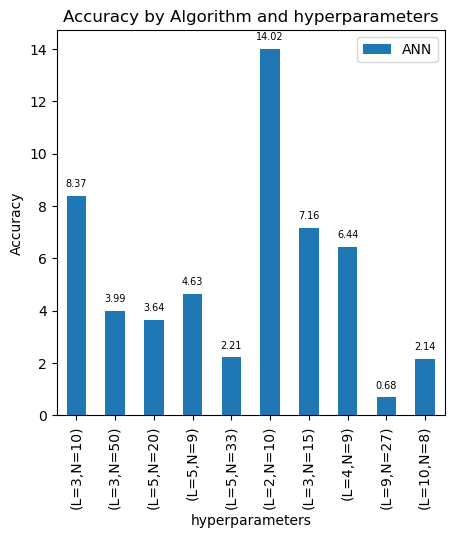

In [ ]:
# Define the data dictionary
data1 = pd.DataFrame({'ANN':[grid_search.iloc[0,2]*100, grid_search.iloc[1,2]*100,grid_search.iloc[2,2]*100,grid_search.iloc[3,2]*100,grid_search.iloc[4,2]*100,grid_search.iloc[5,2]*100,grid_search.iloc[6,2]*100,grid_search.iloc[7,2]*100,grid_search.iloc[8,2]*100,grid_search.iloc[9,2]*100]},index=["(L=3,N=10)", "(L=3,N=50)","(L=5,N=20)","(L=5,N=9)","(L=5,N=33)","(L=2,N=10)","(L=3,N=15)","(L=4,N=9)","(L=9,N=27)","(L=10,N=8)"])
#data1.plot(kind="bar",figsize=(15, 8))

ax = data1.plot(kind="bar", figsize=(5, 5))

ax.set_title("Accuracy by Algorithm and hyperparameters")
ax.set_xlabel("hyperparameters")
ax.set_ylabel("Accuracy")

# Add values above the bars
for i in ax.containers:
    ax.bar_label(i, label_type="edge", labels=[f"{x:.2f}" for x in i.datavalues], fontsize=7, padding=5)

plt.show()

***Assigniment 4 :***

**Comparison of the ANN that we implmented from scratch and the ANN of sklearn library**

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score
# Create an instance of the NearestNeighbors model
start_time_ann_sk=time.time()
model = NearestNeighbors(n_neighbors=1, algorithm='kd_tree', leaf_size=n_val, n_jobs=-1)
# Fitting the model
model.fit(hananya1_features,hananya1_labels)
pred=model.kneighbors(hananya2_features.iloc[:3,:])
#calculating the excution time
end_time_ann_sk=time.time()
total_time_ann_sk=end_time_ann_sk-start_time_ann_sk
print("The total time of ANN of sklearn library is :")
print(total_time_ann_sk)

The total time of ANN of sklearn library is :
0.02702021598815918


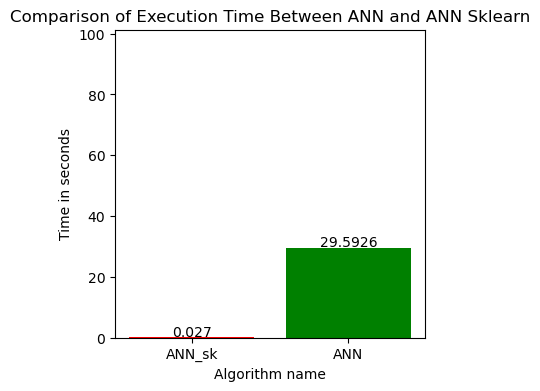

In [ ]:
# Define the data dictionary
data = {'Algorithm_name': ['ANN_sk', 'ANN'], 'Time': [total_time_ann_sk, total_time_ann]}
# Set the width and height of the figure
plt.figure(figsize=(4,4))
execution_time_df2 = pd.DataFrame(data)
# Create a bar plot
colors=['red','green']
plt.bar(execution_time_df2['Algorithm_name'], execution_time_df2['Time'],color=colors)

# Set the y-axis limits to zoom in on the bars
plt.ylim(0, max(execution_time_df['Time']) * 1.1)
# Add values above the bars
for i, val in enumerate(execution_time_df2['Time']):
    plt.text(i, val+0.3, str(round(val, 4)), horizontalalignment='center', fontsize=10)

# Add labels to the plot
plt.xlabel('Algorithm name')
plt.ylabel('Time in seconds')
plt.title('Comparison of Execution Time Between ANN and ANN Sklearn')

# Display the plot
plt.show()


comparing by accuarcy between sklearn libary and our ANN class

In [ ]:
#leaf size as hyperparmter
hyper = [10,50,20,9,33,10,15,9,27,8]

#calculating the error values of ANN from sklearn library for each hyperparmter
errors=[[0, 0] for _ in range(10)]
for n in range (10):
  total_sum_ann_sk=0
  count_ann_sk=0
  ann_sk = NearestNeighbors(n_neighbors=1, algorithm='kd_tree', leaf_size=hyper[n], n_jobs=-1)
  # Fitting the model
  ann_sk.fit(hananya1_features,hananya1_labels)
  pred=ann_sk.kneighbors(hananya2_features.iloc[:,:])
  for i in ann_kneighbors.index:

     total_sum_ann_sk+=(((np.double(pred[0][i]))/(knn_kneighbors.loc[i, "distance"]))-1)
     count_ann_sk=count_ann_sk+1
  error_ann_sk=((1/count_ann_sk)*total_sum_ann_sk)
  errors[n][1]=error_ann_sk
  errors[n][0]=hyper[n]



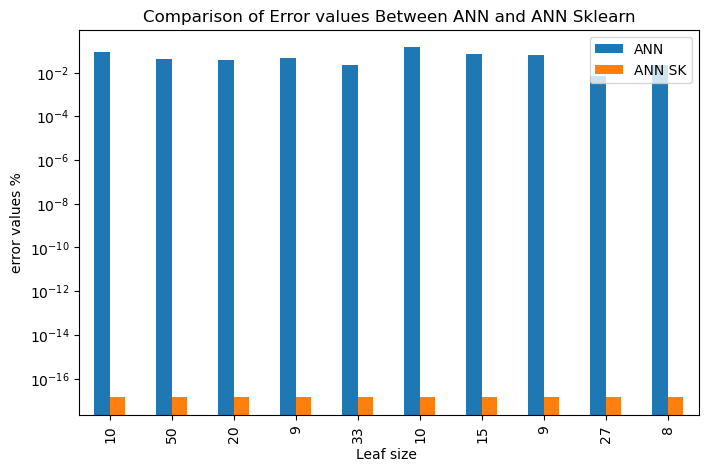

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_values = [10, 50, 20, 9, 33, 10, 15, 9, 27, 8]
y_values1 = grid_search['error_values'].values
y_values2 = [errors[i][1] for i in range(len(errors))]
# Define the data dictionary
data1 = pd.DataFrame({'ANN':y_values1,"ANN SK":y_values2},index=x_values)

ax = data1.plot(kind="bar", figsize=(8, 5))

# Convert y-values to percentages
y_values1_perc = np.array(y_values1) * 100
y_values2_perc = np.array(y_values2) * 100
plt.title('Comparison of Error values Between ANN and ANN Sklearn')
#we have high varience between the values of ann and ann from sklearn thats why we use log as scale of y dimension
plt.yscale('log')


#names of x and y
plt.xlabel('Leaf size ')
plt.ylabel('error values %')
plt.legend()

plt.show()


***Assigniment 5 :***

***Predicting The Picture Name***


In [ ]:
    #copying the datframes so we can change their index without changing the index of the real data
hashmal1_labels_copy=pd.DataFrame()
hashmal1_features_copy=pd.DataFrame()
hashmal1_labels_copy=hashmal1_labels.copy()
hashmal1_features_copy=hashmal1_features.copy()
    #***********************************************************************#
hashmal2_labels_copy=pd.DataFrame()
hashmal2_features_copy=pd.DataFrame()
hashmal2_labels_copy=hashmal2_labels.copy()
hashmal2_features_copy=hashmal2_features.copy()

    # setting the index of hashmal1_labels.copy and hashmal1_features_copy to be respectivly to the index of hananya1
new_index1 = pd.RangeIndex(start=780,stop=4807)
    # set the name of the index to 'index_name'
new_index1 = new_index1.set_names(['index_name'])
    # set the new index for the dataframe
hashmal1_labels_copy.index = new_index1
hashmal1_features_copy.index = new_index1
    #********************************************************************************************
    # setting the index of hashmal1_labels.copy and hashmal1_features_copy to be respectivly to the index of hananya1
new_index2 = pd.RangeIndex(start=913,stop=4967)
    # set the name of the index to 'index_name'
new_index1 = new_index2.set_names(['index_name'])
hashmal2_labels_copy.index = new_index2
hashmal2_features_copy.index = new_index2

    #merging the data of the two files into one data set
merged_features = pd.concat([hananya1_features, hashmal1_features_copy], axis=0)
merged_labels=pd.concat([hananya1_labels, hashmal1_labels_copy], axis=0)
merged_data=pd.concat([hananya_one, hashmal_one], axis=0)

    #**********************************************************************************************
merged_features2 = pd.concat([hananya2_features, hashmal2_features_copy], axis=0)
merged_labels2=pd.concat([hananya2_labels, hashmal2_labels_copy], axis=0)
merged_data2=pd.concat([hananya_two, hashmal_two], axis=0)

    #training the model in the merged dataset
ann_model= ANN(N=10 ,L=3,k=5,data=merged_data)
ann_model.fit(X=merged_features ,Y=merged_labels)


    #predicting
predictions_class=ann_model.predict(merged_features2.iloc[:,:])
print(predictions_class)
true_positive=0
true_negative=0
false_postive=0
false_negative=0
for i in range(predictions_class.shape[0]):
      if i<914 :
        if predictions_class.iloc[i,0]=='Hashmal1' :
          false_postive+=1
        if predictions_class.iloc[i,0]=='Hananya1' :
          true_negative+=1
      if i>=914 :
        if predictions_class.iloc[i,0]=='Hashmal1' :
          true_positive+=1
        if predictions_class.iloc[i,0]=='Hananya1' :
          false_negative+=1

print("Accuarcy of predict method is : ")
accuarcy_predict= ((true_positive+true_negative)/(true_positive+true_negative+false_postive+false_negative))*100
print(accuarcy_predict)




         class
0     Hananya1
1     Hashmal1
2     Hananya1
3     Hananya1
4     Hananya1
...        ...
4962  Hananya1
4963  Hashmal1
4964  Hananya1
4965  Hananya1
4966  Hananya1

[4967 rows x 1 columns]
Accuarcy of predict method is : 
70.5456009663781


*** *Bonus -  implmenting LSH algortheim from scratch  ****

In [ ]:
import random
class LSH:

  def __init__(self,X,Y,K):
    self.X=X
    self.Y=Y
    self.K=K
    self.buckets = {}
    self.cuts_midians = []
    self.vectors=[]
    self.root = self._build(X=self.X,Y=self.Y)
 #-----------------------------------------------------------------------------------------
  def _build(self,X,Y):

    #Choosing random feature for the split
    coulmns_names=list(X.columns)

    for i in range(self.K):
        random_feature=random.choice(coulmns_names[4:])
        #find the median of evre feature of the k and storing them in midian_value
        midian_value = X[random_feature].median()
        self.cuts_midians.append([random_feature,midian_value])
    #calculating the hash code of every point
    for i in range(self.Y.shape[0]):
      cur_point_vector = self._get_code(self.X.iloc[i])
      self.vectors.append(cur_point_vector)

    for i in range(len(self.vectors)):
    # convert from array to string
      hash_str =  ''.join(str(i) for i in self.vectors[i])
    # create bucket if it doesn't exist
      if hash_str not in self.buckets.keys():
        self.buckets[hash_str] = []
    # add pint index to the bucket that belongs to
      self.buckets[hash_str].append(i)


    return self.buckets
 #-----------------------------------------------------------------------------------------
  def _get_code(self,point):
     #for each feautre vlaue from the point row calculate if its get 1 or o and return the hash code of this point
     cur_point_vector = [random.randint(0, 0) for i in range(self.K)]
     for j in range(len(self.cuts_midians)):

          if point[self.cuts_midians[j][0]] >= self.cuts_midians[j][1] :
             cur_point_vector[j] = 1
          else:
             cur_point_vector[j] = 0
     return cur_point_vector

ANN class bonus :

In [ ]:
from numpy.core.numeric import indices
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_similarity
from math import dist
class ANN_Bonus:
  def __init__(self,L,k,data):
   self.L=L
   self.k=k
   self.data=data
   self.LSH_tables=None
  #-----------------------------------------------------------------------------
  def fit(self, X , Y):
   #Creating L tables
    self.X_train=X
    self.Y_train=Y
    self.LSH_tables= list()
    #creating L tables
    for i in range(self.L):
      LSH_table =LSH(X,Y,self.k )
      self.LSH_tables.append(LSH_table)
#------------------------------------------------------------------------------
  def kneighbors(self, test,neighbors_n):
     predictions = pd.DataFrame(columns=["sample_numebr_test","Y","X","scale","angle","distance"])
     for i in range(test.shape[0]):
       pred = self.kneighbors_helper(test.iloc[i],i,neighbors_n)
       predictions=pd.concat([predictions, pred], ignore_index=True)
     return predictions
#-------------------------------------------------------------------------------
  def kneighbors_helper(self, test_point,point_num,neighbors_n):
   #Extracting the  from the tables
    neighbors_of_point = list()

    for table in self.LSH_tables:
      vec = table._get_code(test_point)
      str_vec = ''.join(str(d) for d in vec)
      vec=np.array(vec)
      #if the hash code of the current point not in the buckets we find the nearst bucket to be belong to it by calculating manhatin distance
      #(the number of mistakes) then we sort then we add this point to the hash code with smallist mistakes
      if str_vec not in table.buckets.keys():
          all_hash_codes=table.buckets.keys()
          binary_array = np.array([list(map(int, s)) for s in all_hash_codes])
          s_array = np.array(list(map(int, str_vec)))
          # Compute the Hamming distances between s and each string in the list
          hamming_distances = np.sum(binary_array != s_array, axis=1)

# Find the index of the string with the smallest Hamming distance
          most_similar_index = np.argmin(hamming_distances)

# Get the most similar string from the list
          most_similar_string = binary_array[most_similar_index]
          string = "".join(str(int(x)) for x in most_similar_string)
          for j in table.buckets[string] :
           neighbors_of_point.append(j)
      else:
          for j in table.buckets[str_vec] :
            neighbors_of_point.append(j)

    #elimnating duplicates
    unique_list_of_neighbors = list(set(neighbors_of_point))


    #Extracting the observations from the nodes
    #finding the neighbors by their indices
    point_neighbors=pd.DataFrame()
    for i in unique_list_of_neighbors:
        new_row=self.data.iloc[i,:]
        point_neighbors = pd.concat([point_neighbors, pd.DataFrame(new_row, index=[0])], ignore_index=True)

    #calculating the distances
    distances_ds={"sample" : [] , "distance": []}

    distances=[0] * point_neighbors.shape[0]
    for i in range(point_neighbors.shape[0]):

          distances[i] = dist(test_point,self.data.iloc[unique_list_of_neighbors[i],4:])
          distances_ds["sample"].append(unique_list_of_neighbors[i])
          distances_ds["distance"].append( distances[i])


    distances_ds = pd.DataFrame(distances_ds)
    distances_ds_sorted=distances_ds.sort_values(("distance"),ascending=True)

    k_indices =distances_ds_sorted[:neighbors_n]

    k_indices=pd.DataFrame(k_indices)
    k_nearest_neighbors={"sample_numebr_test":[],"Y":[],"X":[],"scale":[],"angle":[],"distance":[]}
    k_nearest_neighbors_df = pd.DataFrame(k_nearest_neighbors)
    for i in range(len(k_indices)):
            sample_number=str(point_num).replace('.', '')
            new_row={"sample_numebr_test":sample_number,"Y": ( self.data.iloc[k_indices.iloc[i,0],0]), "X": ( self.data.iloc[k_indices.iloc[i,0],1]), "scale": ( self.data.iloc[k_indices.iloc[i,0],2]), "angle": ( self.data.iloc[k_indices.iloc[i,0],3]), "distance": (k_indices.iloc[i,1])}

            k_nearest_neighbors_df = pd.concat([k_nearest_neighbors_df, pd.DataFrame(new_row, index=[0])], ignore_index=True)


    return k_nearest_neighbors_df

In [ ]:
%%time
import time
start_time_knn_bonus=time.time()
#Training the model with 'Hananya1' picture dataset
knn_model_bonus = KNN(k=1)
#Spliting the dataset to features and labels
hananya1_features_bonus = hananya_one.iloc[: , 4:]
hananya1_labels_bonus = hananya_one.iloc[: , :4]
knn_model_bonus.fit(X=hananya1_features_bonus ,Y=hananya1_labels_bonus)

#Testing the model with 'Hananya2' picture dataset
hananya2_features_bonus = hananya_two.iloc[: , 4:]
hananya2_labels_bonus=hananya_two.iloc[: , :4]
kneighbors_using_knn_bonus =knn_model_bonus.kneighbors(hananya2_features_bonus.iloc[:,:])
end_time_knn_bonus=time.time()
total_time_knn_bonus=end_time_knn_bonus - start_time_knn_bonus
print(kneighbors_using_knn_bonus)


    sample_number       Y       X  scale  angle    distance
0               0  201.45  383.78  15.63  1.636  124.201449
1               1  235.13  331.52   7.26  1.358  347.777228
2               2  207.54  141.90   1.27  1.393  197.567710
3               3  207.54  141.90   1.27  1.393  149.057036
4               4  201.50   41.66   1.20  1.451  117.813412
..            ...     ...     ...    ...    ...         ...
908           908  206.91  216.79   1.36  1.817  147.315987
909           909  204.13  122.59   1.72  1.816  132.996241
910           910  220.95  476.23   1.87  1.327  202.012376
911           911  203.97  219.03   1.14  1.654  135.790279
912           912  200.84  124.57   1.16  1.580  143.739347

[913 rows x 6 columns]
Wall time: 39.5 s


*4_bonus . runnig the algortheim using 10 couples of hyperparmters*

In [ ]:
import itertools

#intilazizing the grid_search data structure
grid_search_bonus={"L_values" : [] , "K_values": [] , "error_values":[],"time":[]}

#values of hyperparmaters

hyper = [[3,10],[3,50],[5,20],[5,30],[5,33],[2,70],[3,15],[4,9],[9,27],[10,8]]
for h in range(10):
    total_sum = 0
    count = 0
    start_time = time.time()
    #running the ann model with the hyperparmaters
    ann_model_bonus= ANN_Bonus(L=hyper[h][0] ,k=hyper[h][1],data=hananya_one)
    ann_model_bonus.fit(X=hananya1_features_bonus ,Y=hananya1_labels_bonus)
    ann_kneighbors_bonus=ann_model_bonus.kneighbors(test=hananya2_features_bonus.iloc[:,:],neighbors_n=1)
    knn_kneighbors2=kneighbors_using_knn_bonus

    #calculating the error value according to the formula

    for i in ann_kneighbors_bonus.index:

     total_sum+=(((ann_kneighbors_bonus.loc[i, "distance"])/(knn_kneighbors2.loc[i, "distance"]))-1)
     count=count+1
    error_=((1/count)*total_sum)
    end_time = time.time()

    #calculating the excuting time for each itration
    time_taken = end_time - start_time

    #storing the values
    grid_search_bonus["L_values"].append(hyper[h][0])
    grid_search_bonus["K_values"].append(hyper[h][1])
    grid_search_bonus["error_values"].append(error_)
    grid_search_bonus["time"].append(time_taken)

grid_search_bonus = pd.DataFrame(grid_search_bonus)
min_score_row = grid_search_bonus.loc[grid_search_bonus['error_values'].idxmin()]

print(grid_search_bonus)
print("The best hyperparmters:")
print(min_score_row)

   L_values  K_values  error_values        time
0         3        10      0.207532   19.381959
1         3        50      0.185847   24.828810
2         5        20      0.177972   23.041289
3         5        30      0.140111   28.130886
4         5        33      0.159845   28.840769
5         2        70      0.226261   19.776757
6         3        15      0.264120   11.459852
7         4         9      0.162526   33.782378
8         9        27      0.110564   42.385957
9        10         8      0.045280  203.850714
The best hyperparmters:
L_values         10.000000
K_values          8.000000
error_values      0.045280
time            203.850714
Name: 9, dtype: float64


*5_bonus . checking valdiation of LSH algortheim*

In [ ]:
import math
#choosing the first row as best hyperparmters because the dataframe is sorted starting from the best
best_hyperpatmters=min_score_row
l_val=int(best_hyperpatmters["L_values"])
k_val=int(best_hyperpatmters["K_values"])
print(l_val)
#running the ann model on the best hyperpamrters
start_time_ann=time.time()
ann_model= ANN_Bonus(L=l_val,k=k_val,data=hananya_one)
ann_model.fit(X=hananya1_features_bonus ,Y=hananya1_labels_bonus)
ann_nieghbors=ann_model.kneighbors(hananya2_features_bonus.iloc[:,:],neighbors_n=2)

end_time_ann=time.time()
total_time_ann=end_time_ann - start_time_ann
attribution={"sample":[],"nearest_n_Y":[],"nearest_n_X":[],"nearest_n_distance":[],"ratio":[]}
for i in range(0,ann_nieghbors.shape[0]-1,2):
    if(i<ann_nieghbors.shape[0]):

      #taking the nearst n ,and the second nearst with their distances
      nearest_n=ann_nieghbors.iloc[i,:]
      second_nearest =ann_nieghbors.iloc[i+1,:]
      nearest_n_distance=nearest_n.iloc[5]
      second_nearest_distance=second_nearest.iloc[5]

      #calculating the ratio
      ratio = (nearest_n_distance/second_nearest_distance)

      attribution["sample"].append(ann_nieghbors.loc[i,"sample_numebr_test"])

      #if the ratio less than 0.8 return the nearst neighbor
      if ratio < 0.8:
          attribution["nearest_n_Y"].append(nearest_n.iloc[1])
          attribution["nearest_n_X"].append(nearest_n.iloc[2])
          attribution["nearest_n_distance"].append(nearest_n.iloc[5])
          attribution["ratio"].append(ratio)
      #if the ratio bigger than 0.8 return just the distance
      else :
          attribution["nearest_n_Y"].append(None)
          attribution["nearest_n_X"].append(None)
          attribution["nearest_n_distance"].append(nearest_n.iloc[5])
          attribution["ratio"].append(ratio)

#printing the results
attribution = pd.DataFrame(attribution)
attribution=attribution.sort_values(["ratio"],ascending=[True])
print(attribution)
count_neasrt_n=0
print(attribution.shape[0])
for i in range(attribution.shape[0]):

  if( math.isnan(attribution.loc[i,"nearest_n_Y"])):

    count_neasrt_n =count_neasrt_n+1
print("The number of samples that get None as nearst neighbor is : ")
print( count_neasrt_n)
print(count_neasrt_n/913)

10
    sample  nearest_n_Y  nearest_n_X  nearest_n_distance     ratio
584    584       248.30       103.12          127.906216  0.387593
580    580       255.74       595.31          146.482081  0.435665
574    574       275.40       533.24          211.950466  0.491099
451    451       205.17        91.48           98.137658  0.545487
134    134       216.41        75.91          161.452779  0.584066
..     ...          ...          ...                 ...       ...
798    798          NaN          NaN          350.962961  0.999420
205    205          NaN          NaN          333.204142  0.999545
595    595          NaN          NaN          414.109889  0.999575
540    540          NaN          NaN          343.666990  0.999937
533    533          NaN          NaN          407.493558  0.999952

[913 rows x 5 columns]
913
The number of samples that get None as nearst neighbor is : 
844
0.9244249726177437


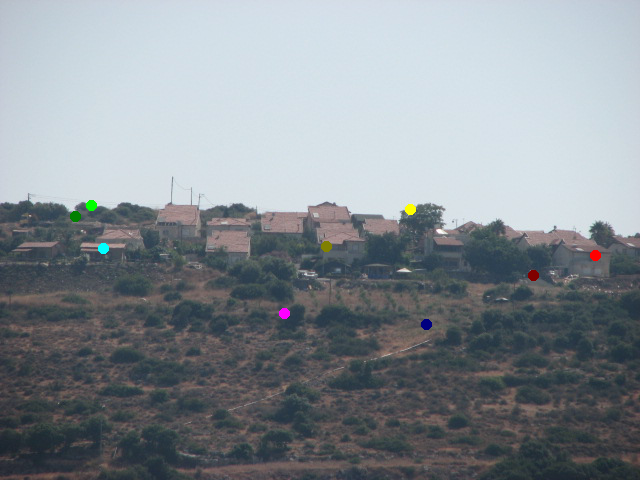

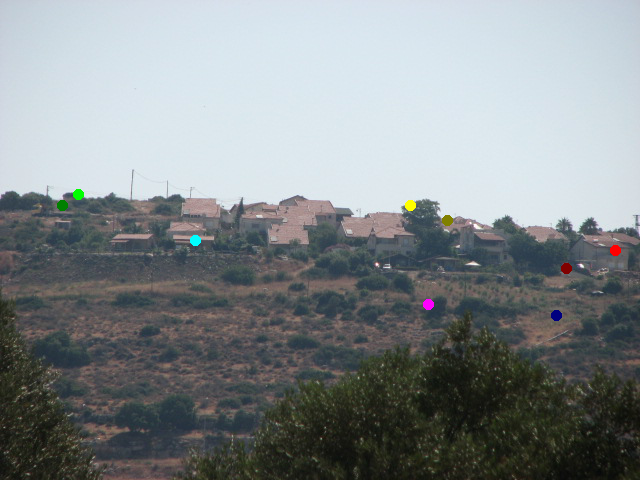

In [ ]:
from PIL import Image, ImageDraw
best_ten= attribution.iloc[:10]
# Load the images

img1= Image.open("Hananya1.JPG")
img2 = Image.open("Hananya2.JPG")
labels2 = hananya_two.iloc[: , :4]
l_val=int(best_hyperpatmters["L_values"])
n_val=int(best_hyperpatmters["K_values"])

colors=[(0,255,255),(255,0,0),(128,0,0),(0,255,0),(0,128,0),
        (0,0,255),(0,0,128),(255,255,0),(128,128,0),(255,0,255)]
point_size=5
draw2 = ImageDraw.Draw(img2)
draw1=ImageDraw.Draw(img1)
y1=0
x1=0
for  m in range(best_ten.shape[0]):
   color= colors[m%len(colors)]
   y1=int(best_ten.iloc[m,1])
   x1=int(best_ten.iloc[m,2])
   sample=int(best_ten.iloc[m,0])
   y2=int(hananya2_labels_bonus.iloc[sample,0])
   x2=int(hananya2_labels_bonus.iloc[sample,1])
   draw1.ellipse((x1-point_size,y1-point_size,x1+point_size,y1+point_size),fill=color)
   draw2.ellipse((x2-point_size,y2-point_size,x2+point_size,y2+point_size),fill=color)

# img1.show()
# img2.show()

# show the images
display(img1)
display(img2)


***6_bonus: comparsion between ANN with LSH and KNN***

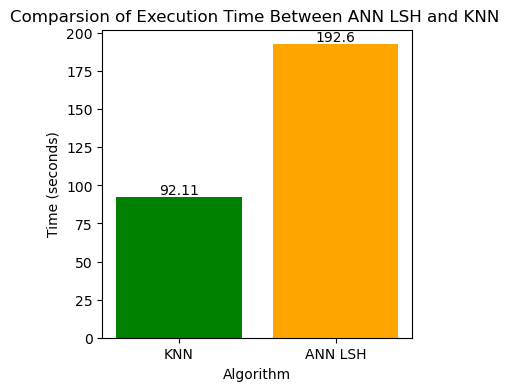

In [ ]:

# Define the data dictionary
data = {'Algorithm_name': ['KNN', 'ANN LSH'], 'Time': [total_time_knn, total_time_ann]}
# Create a DataFrame from the dictionary
execution_time_df = pd.DataFrame(data)
# Set the width and height of the figure
plt.figure(figsize=(4,4))
#colors of bar chart
colors=['green','orange']
# Create a bar plot
plt.bar(execution_time_df['Algorithm_name'], execution_time_df['Time'],color=colors)
# Add values above the bars
for i, val in enumerate(execution_time_df['Time']):
    plt.text(i, val, str(round(val, 2)), horizontalalignment='center', verticalalignment='bottom')

# Add labels to the plot
plt.xlabel('Algorithm')
plt.ylabel('Time (seconds)')
plt.title('Comparsion of Execution Time Between ANN LSH and KNN ')
# Display the plot
plt.show()

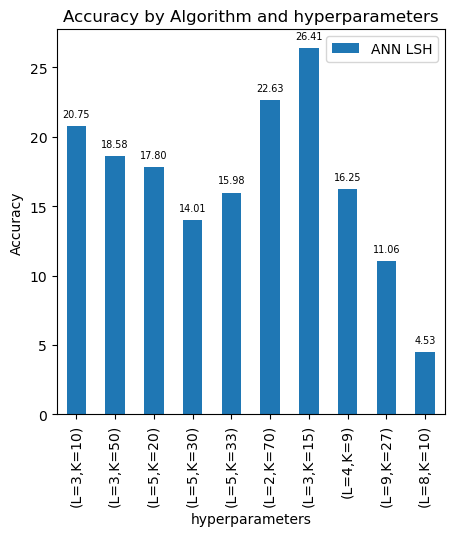

In [ ]:
# Define the data dictionary
data1 = pd.DataFrame({'ANN LSH':[grid_search_bonus.iloc[0,2]*100, grid_search_bonus.iloc[1,2]*100,grid_search_bonus.iloc[2,2]*100,grid_search_bonus.iloc[3,2]*100,grid_search_bonus.iloc[4,2]*100,grid_search_bonus.iloc[5,2]*100,grid_search_bonus.iloc[6,2]*100,grid_search_bonus.iloc[7,2]*100,grid_search_bonus.iloc[8,2]*100,grid_search_bonus.iloc[9,2]*100]},index=["(L=3,K=10)", "(L=3,K=50)","(L=5,K=20)","(L=5,K=30)","(L=5,K=33)","(L=2,K=70)","(L=3,K=15)","(L=4,K=9)","(L=9,K=27)","(L=8,K=10)"])
#data1.plot(kind="bar",figsize=(15, 8))

ax = data1.plot(kind="bar", figsize=(5, 5))

ax.set_title("Accuracy by Algorithm and hyperparameters")
ax.set_xlabel("hyperparameters")
ax.set_ylabel("Accuracy")

# Add values above the bars
for i in ax.containers:
    ax.bar_label(i, label_type="edge", labels=[f"{x:.2f}" for x in i.datavalues], fontsize=7, padding=5)

plt.show()